In [17]:
import geopandas as gpd

fnOutput = '../_site/data/segmentsWithAggFields_v901.geojson'

In [18]:
segments = gpd.read_file('../data/shapefiles/WFv901_Segments_20240226_Draft.shp')
segments = segments[['SEGID','geometry']]
segments = segments.to_crs(32612)
segments

,SEGID,geometry
0,0006_141.0,"LINESTRING (405824.110 4423860.330, 406035.300..."
1,0006_146.9,"LINESTRING (413442.550 4422753.728, 413459.600..."
2,0006_149.9,"LINESTRING (418330.800 4422866.000, 418629.100..."
3,0006_150.6,"LINESTRING (419421.880 4422872.296, 419780.300..."
4,0006_152.6,"LINESTRING (422596.900 4422889.295, 422598.500..."
...,...,...
4975,WFRC_8469,"LINESTRING (407213.374 4504030.989, 407034.934..."
4976,WFRC_8470,"LINESTRING (407723.200 4503422.753, 407213.374..."
4977,WFRC_8471,"LINESTRING (415734.595 4481608.605, 415755.740..."
4978,WFRC_8472,"LINESTRING (424308.500 4489341.200, 424304.312..."


In [19]:
tazs = gpd.read_file('../_site/data/tazWithAggFields.geojson')
tazs = tazs.to_crs(32612)
tazs

,OBJECTID,TAZID,CO_FIPS,PLANAREA,CITY_UGRC,DISTSUPER,DISTLRG,DISTMED,DISTSML,Shape_Length,Shape_Area,EFA,geometry
0,1,1,3,WFRC,na,1,1,1,1,10551.324502,2.344651e+06,,"POLYGON ((413242.418 4602513.091, 413242.418 4..."
1,2,2,3,WFRC,na,1,1,1,1,4009.601033,5.499126e+05,,"POLYGON ((413059.918 4605181.391, 413085.118 4..."
2,3,3,3,WFRC,na,1,1,1,1,8930.121537,2.684407e+06,,"POLYGON ((409646.217 4605179.891, 409429.117 4..."
3,4,4,3,WFRC,na,1,1,1,1,5815.392155,1.514073e+06,,"POLYGON ((410635.818 4603328.791, 410540.618 4..."
4,5,5,3,WFRC,na,1,1,1,1,10367.648688,4.171793e+06,,"POLYGON ((413070.518 4605050.091, 413059.918 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,3542,3506,49,MAG,na,7,25,68,101,5043.109536,1.330461e+06,,"POLYGON ((452774.500 4467226.009, 452081.530 4..."
3542,3543,3508,49,MAG,na,7,25,68,101,17430.424081,1.395530e+07,,"POLYGON ((452421.018 4469204.174, 452224.518 4..."
3543,3544,3504,49,MAG,na,7,25,68,101,11094.962299,4.871445e+06,,"POLYGON ((450979.681 4467432.645, 450725.948 4..."
3544,3545,3546,49,MAG,na,7,25,71,101,70837.864407,2.404877e+08,,"POLYGON ((498486.432 4416621.657, 492906.281 4..."


In [20]:

# Ensure both GeoDataFrames are in the same CRS
segments = segments.to_crs(tazs.crs)

# Calculate the centroid for each polyline
# The centroid is a point that represents the geometric center of the polyline
centroid_gdf = segments.copy()
centroid_gdf['geometry'] = segments.centroid

# Perform the spatial join
# This time, the operation joins the centroid GeoDataFrame to the tazs
# based on the 'within' operation, which checks if the centroid is within a polygon
joined = gpd.sjoin(centroid_gdf, tazs, how="inner", predicate='within')

# The result is a GeoDataFrame where each polyline's centroid is within a polygon
# Now, 'joined' contains polyline information with their corresponding TAZID from the tazs

# If you want to keep the original polyline geometries in the final result,
# you can merge the original segments GeoDataFrame with the 'joined' GeoDataFrame based on index
final_result = segments.merge(joined[['TAZID','CO_FIPS','PLANAREA','CITY_UGRC','DISTSUPER','DISTLRG','DISTMED','DISTSML','EFA']], left_index=True, right_index=True, how='inner')

# Optionally, create a new GeoDataFrame or save the result with necessary columns
#result = final_result[['geometry', 'TAZID']]  # Keep the original segments geometry and the TAZID

# Save the result to a new file (optional)
final_result.to_file(fnOutput, driver='GeoJSON')

print("Modification completed and saved.")

Modification completed and saved.


<AxesSubplot:>

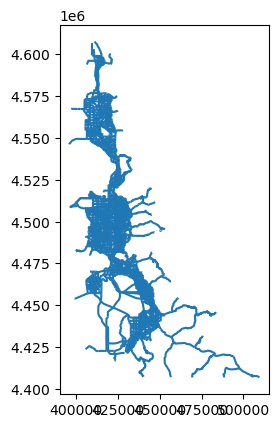

In [21]:
final_result.plot()